# **Reading sources**
Applying text mining to identify relevant literature in food science: Cold denaturation as a case study https://doi.org/10.1111/1750-3841.15940

LDA Code 
https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

In [46]:
import pandas as pd
import os

comments = pd.read_csv("data_copy.csv")
comments.head()

/Users/brianzhang/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,title,content,date,variant,images,verified,author,rating,product,url
0,Thick it works .....,Easy to thicken and works very well. Unfortun...,22 Apr 2021,Size: 2.25 Pound (Pack of 1) Style: 36 oz,NaN,No,Amazon Customer,5.0,"Thick-It Original Food & Beverage Thickener, 3...",https://www.amazon.com/Thick-It-RD26929208-36-...
1,Five Stars,Great Product.,16 Jun 2016,Size: 2.25 Pound (Pack of 1) Style: 36 oz,NaN,No,Mildred S. Hanby,5.0,"Thick-It Original Food & Beverage Thickener, 3...",https://www.amazon.com/Thick-It-RD26929208-36-...
2,Five Stars,As good as it gets !!!!,22 Aug 2016,Size: 2.25 Pound (Pack of 1) Style: 36 oz,NaN,No,bamatown,5.0,"Thick-It Original Food & Beverage Thickener, 3...",https://www.amazon.com/Thick-It-RD26929208-36-...
3,Five Stars,Order always arrives promptly. I order from Pr...,06 Jul 2016,Size: 2.25 Pound (Pack of 1) Style: 36 oz,NaN,No,Heidi Morehouse,5.0,"Thick-It Original Food & Beverage Thickener, 3...",https://www.amazon.com/Thick-It-RD26929208-36-...
4,Three Stars,Good product and good value.,08 Aug 2014,Size: 2.25 Pound (Pack of 1) Style: 36 oz,NaN,No,Grammy O,3.0,"Thick-It Original Food & Beverage Thickener, 3...",https://www.amazon.com/Thick-It-RD26929208-36-...


In [47]:
#remove columns 
comments = comments.loc[:, comments.columns.intersection(['title','content'])]
comments.head()

/Users/brianzhang/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,title,content
0,Thick it works .....,Easy to thicken and works very well. Unfortun...
1,Five Stars,Great Product.
2,Five Stars,As good as it gets !!!!
3,Five Stars,Order always arrives promptly. I order from Pr...
4,Three Stars,Good product and good value.


In [48]:
# combine title and content 
for i in range(0, len(comments)):
    comments['content'][i] = comments['title'][i] + " " + comments['content'][i]
comments.head()

/Users/brianzhang/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,title,content
0,Thick it works .....,Thick it works ..... Easy to thicken and works...
1,Five Stars,Five Stars Great Product.
2,Five Stars,Five Stars As good as it gets !!!!
3,Five Stars,Five Stars Order always arrives promptly. I or...
4,Three Stars,Three Stars Good product and good value.


In [49]:
# Load the regular expression library
import re

# Remove punctuation
comments['content_text_processed'] = \
comments['content'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
comments['content_text_processed'] = \
comments['content_text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
comments['content_text_processed'].head()

/Users/brianzhang/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:6: DeprecationWarning: invalid escape sequence \.
<>:6: DeprecationWarning: invalid escape sequence \.
<ipython-input-49-45bbf9bdb991>:6: DeprecationWarning: invalid escape sequence \.
  comments['content'].map(lambda x: re.sub('[,\.!?]', '', x))


0    thick it works  easy to thicken and works very...
1                             five stars great product
2                      five stars as good as it gets  
3    five stars order always arrives promptly i ord...
4              three stars good product and good value
Name: content_text_processed, dtype: object

/Users/brianzhang/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


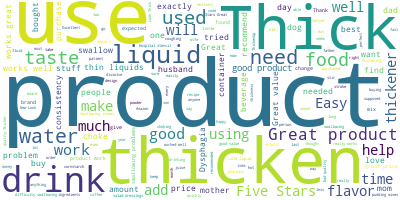

In [50]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(comments['content'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [51]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['product', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data = comments.content_text_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

/Users/brianzhang/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/brianzhang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['thick', 'works', 'easy', 'thicken', 'works', 'well', 'unfortunately', 'takes', 'quite', 'bit', 'cup', 'using', 'lot', 'works', 'happy']


In [52]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 3)]


/Users/brianzhang/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [53]:
from pprint import pprint
# number of topics
num_topics = 3
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/Users/brianzhang/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.020*"great" + 0.017*"thick" + 0.015*"swallowing" + 0.014*"liquids" + '
  '0.010*"price" + 0.009*"stars" + 0.009*"good" + 0.009*"water" + 0.008*"five" '
  '+ 0.008*"liquid"'),
 (1,
  '0.015*"good" + 0.012*"thick" + 0.011*"like" + 0.010*"thicken" + 0.009*"bad" '
  '+ 0.009*"water" + 0.008*"swallowing" + 0.007*"well" + 0.007*"food" + '
  '0.006*"taste"'),
 (2,
  '0.025*"works" + 0.022*"great" + 0.015*"water" + 0.014*"thick" + '
  '0.012*"well" + 0.012*"liquids" + 0.009*"used" + 0.009*"like" + 0.008*"good" '
  '+ 0.007*"price"')]


In [54]:
import pyLDAvis.gensim as gensimvis
import pyLDAvis
import pickle 

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

/Users/brianzhang/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ModuleNotFoundError: No module named 'pyLDAvis.gensim'